In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
# 데이터 읽어오기
df = pd.read_csv('./eda-proj-fc-purchase.csv')

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


In [4]:
df['거래id'].nunique() # row수와 같으므로 거래 id 컬럼 의미 없음 -> 삭제
# REFUND와 PAYMENT를 거래id를 통해 동작하는 것이 아닌 것

159328

In [5]:
df.describe()

,거래id,고객id,코스ID,실거래금액
count,1.593280e+05,159328.000000,159328.000000,1.593280e+05
mean,1.968703e+06,50061.549903,207679.355123,1.418337e+05
std,2.516892e+05,28850.738273,3541.408820,1.397796e+05
min,1.486194e+06,0.000000,2204.000000,-1.054400e+06
25%,1.743640e+06,25081.500000,204373.000000,7.800000e+04
50%,1.971748e+06,50082.500000,207161.000000,1.620000e+05
75%,2.188854e+06,75071.000000,210796.000000,2.176000e+05
max,2.417084e+06,99999.000000,214834.000000,1.339200e+06


In [6]:
df['사이트'].unique()
# 사이트는 FASTCAMPUS 하나이므로 의미 없음 
df = df.drop(['사이트','거래id'], axis=1) # 의미없는 컬럼 삭제
df

,유형,고객id,코스ID,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,PAYMENT,20053,209016,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,PAYMENT,58309,210664,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,PAYMENT,18075,211782,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,PAYMENT,41898,213450,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,PAYMENT,94328,210773,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,PAYMENT,39658,204491,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 1. 1. 오전 12:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,PAYMENT,95136,206811,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022. 1. 1. 오전 12:01:12,-,385000,CARD,385000,-,385000,-
159325,PAYMENT,12764,202927,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022. 1. 1. 오전 12:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,PAYMENT,19606,208104,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022. 1. 2. 오전 11:01:24,-,289000,VBANK,289000,-,289000,-


In [7]:
# 유형 확인
df['유형'].unique()

array(['PAYMENT', 'REFUND'], dtype=object)

In [157]:
# 유형별로 DF 분리하기 1. REFUND
df_refund = df[df['유형']=='REFUND']
df_refund

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
1112,2407283,REFUND,92793,213905,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 21개 프로젝트로 완성하는 인터랙티브 웹 개발 with Three...,2022. 12. 30. 오후 4:12:47,-,158000,CARD,-158000,-,-,-158000
1139,2406979,REFUND,94570,214402,FASTCAMPUS,올인원,데이터 사이언스,빵형의 수학 없이 뽀개는 인공지능 입문,2022. 12. 30. 오후 3:12:29,-,130000,CARD,-65000,-,-,-65000
1148,2406934,REFUND,68675,203935,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,2022. 12. 30. 오후 3:12:09,-,222000,CARD,-128000,-,-,-128000
1150,2406926,REFUND,5477,213244,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 30개 사례로 배우는 Anomaly Detection 알고리즘 구...,2022. 12. 30. 오후 2:12:16,-,226000,POINT,-221004,-,-,-221004
1154,2406884,REFUND,51192,211087,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것,2022. 12. 30. 오후 2:12:25,-,185000,TRANS,-185000,-,-,-185000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158633,1554321,REFUND,71667,206848,FASTCAMPUS,RED,데이터 사이언스,The RED : Youtube 알고리즘 개발자 이준석의 추천시스템 마스터 클래스,2022. 1. 3. 오전 10:01:54,-,709000,TRANS,-709000,-,-,-709000
158638,1554311,REFUND,53721,203720,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,2022. 1. 3. 오전 10:01:34,-,220000,CARD,-190000,-,-,-190000
158640,1554309,REFUND,88030,204366,FASTCAMPUS,올인원,마케팅,올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱,2022. 1. 3. 오전 10:01:25,-,136000,POINT,-136000,-,-,-136000
158642,1554306,REFUND,69980,202072,FASTCAMPUS,올인원,프로그래밍,올인원 패키지 : 코딩 첫 걸음 프로젝트,2022. 1. 3. 오전 10:01:01,-,162000,CARD,-162000,-,-,-162000


In [9]:
# 유형별로 DF 분리하기 2. PAYMENT
df_payment = df[df['유형']=='PAYMENT']
df_payment

,유형,고객id,코스ID,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,PAYMENT,20053,209016,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,PAYMENT,58309,210664,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,PAYMENT,18075,211782,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,PAYMENT,41898,213450,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,PAYMENT,94328,210773,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159322,PAYMENT,20990,204366,올인원,마케팅,올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱,2022. 1. 1. 오전 12:01:34,-,137000,CARD,137000,-,137000,-
159323,PAYMENT,39658,204491,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 1. 1. 오전 12:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,PAYMENT,95136,206811,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022. 1. 1. 오전 12:01:12,-,385000,CARD,385000,-,385000,-
159325,PAYMENT,12764,202927,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022. 1. 1. 오전 12:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-


In [10]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148010 entries, 0 to 159326
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   유형         148010 non-null  object
 1   고객id       148010 non-null  int64 
 2   코스ID       148010 non-null  int64 
 3   포맷         148010 non-null  object
 4   카테고리       148010 non-null  object
 5   코스(상품) 이름  148010 non-null  object
 6   거래일자       148010 non-null  object
 7   쿠폰이름       148010 non-null  object
 8   판매가격       148010 non-null  object
 9   결제수단       148010 non-null  object
 10  실거래금액      148010 non-null  int64 
 11  쿠폰할인액      148010 non-null  object
 12  거래금액       148010 non-null  object
 13  환불금액       148010 non-null  object
dtypes: int64(3), object(11)
memory usage: 16.9+ MB


In [11]:
df_refund.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11318 entries, 1112 to 159327
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   유형         11318 non-null  object
 1   고객id       11318 non-null  int64 
 2   코스ID       11318 non-null  int64 
 3   포맷         11318 non-null  object
 4   카테고리       11318 non-null  object
 5   코스(상품) 이름  11318 non-null  object
 6   거래일자       11318 non-null  object
 7   쿠폰이름       11318 non-null  object
 8   판매가격       11318 non-null  object
 9   결제수단       11318 non-null  object
 10  실거래금액      11318 non-null  int64 
 11  쿠폰할인액      11318 non-null  object
 12  거래금액       11318 non-null  object
 13  환불금액       11318 non-null  object
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [98]:
# 결측치가 있는지 확인
df_payment.isnull().sum()

유형           0
고객id         0
코스ID         0
포맷           0
카테고리         0
코스(상품) 이름    0
거래일자         0
쿠폰이름         0
판매가격         0
결제수단         0
실거래금액        0
쿠폰할인액        0
거래금액         0
환불금액         0
dtype: int64

In [99]:
# 결측치가 있는지 확인
df_refund.isnull().sum()

유형           0
고객id         0
코스ID         0
포맷           0
카테고리         0
코스(상품) 이름    0
거래일자         0
쿠폰이름         0
판매가격         0
결제수단         0
실거래금액        0
쿠폰할인액        0
거래금액         0
환불금액         0
dtype: int64

In [12]:
print(df_payment['고객id'].nunique()) #rows는 약 14만 8천개 가량
print(df_refund['고객id'].nunique()) #rows는 약 1만 1천 3백개 가량
# 구매고객은 중복 가능성이 높지만
# 환불하는 사람은 중복가능성이 낮다.

77210
10689


In [32]:
# 카테고리별로 실거래 금액 알아보기
df_pay_category_real = df_payment.groupby(by=['카테고리'])['실거래금액'].mean()
df_pay_category_real = df_pay_category_real.reset_index()
df_pay_category_real.columns = ['카테고리', '실거래금액(평균)']
df_pay_category_real.sort_values(by='실거래금액(평균)', ascending=False)
# 부동산/금융, 투자/재테크, 데이터사이언스가 실거래금액 평균 단가가 높음

,카테고리,실거래금액(평균)
3,부동산/금융,232429.586907
9,투자/재테크,208205.600511
0,데이터 사이언스,195310.274259
6,영상/3D,170761.767198
7,일러스트,166284.911278
1,디자인,162104.392295
10,프로그래밍,154708.762056
2,마케팅,153185.568826
5,업무 생산성,127844.767469
4,부업/창업,113249.508841


In [39]:
# 카테고리별로 실거래 금액 알아보기
df_pay_category_realsum = df_payment.groupby(by=['카테고리'])['실거래금액'].sum()
df_pay_category_realsum = df_pay_category_realsum.reset_index()
df_pay_category_realsum.columns = ['카테고리', '실거래금액(합계)']
df_pay_category_realsum_descending = df_pay_category_realsum.sort_values(by='실거래금액(합계)', ascending=False)
df_pay_category_realsum_descending
# 프로그래밍, 데이터사이언스가 실제 매출액은 가장 높음

,카테고리,실거래금액(합계)
10,프로그래밍,7414108004
0,데이터 사이언스,4856780590
7,일러스트,2370890265
3,부동산/금융,2357533300
6,영상/3D,2216658500
2,마케팅,1841750094
5,업무 생산성,1668629905
1,디자인,1523132870
9,투자/재테크,488866750
4,부업/창업,115288000


In [14]:
# 그럼 카테고리별로 판매가격은 어떤가 보려고 했는데 object 타입
# -> int 타입으로 astype해준다.
df_payment.loc[df_payment['판매가격']=='-', "판매가격"] = 0
df_payment[df_payment['판매가격']==0]
df_payment['판매가격'] = df_payment['판매가격'].astype(int)
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148010 entries, 0 to 159326
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   유형         148010 non-null  object
 1   고객id       148010 non-null  int64 
 2   코스ID       148010 non-null  int64 
 3   포맷         148010 non-null  object
 4   카테고리       148010 non-null  object
 5   코스(상품) 이름  148010 non-null  object
 6   거래일자       148010 non-null  object
 7   쿠폰이름       148010 non-null  object
 8   판매가격       148010 non-null  int64 
 9   결제수단       148010 non-null  object
 10  실거래금액      148010 non-null  int64 
 11  쿠폰할인액      148010 non-null  object
 12  거래금액       148010 non-null  object
 13  환불금액       148010 non-null  object
dtypes: int64(4), object(10)
memory usage: 16.9+ MB


/var/folders/zs/h8q2p2l52vn4v0220zx8lp200000gn/T/ipykernel_3712/826640398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_payment['판매가격'] = df_payment['판매가격'].astype(int)


In [36]:
# 카테고리별로 판매가격 알아보기 (실제거래가격과의 상관성 알아보기)
df_pay_category_price = df_payment.groupby(by=['카테고리'])['판매가격'].mean()
df_pay_category_price = df_pay_category_price.reset_index()
df_pay_category_price.columns = ['카테고리', '판매가격(평균)']
df_pay_category_price.sort_values(by='판매가격(평균)', ascending=False)
# 투자/재테크는 판매가격도 높음

,카테고리,판매가격(평균)
9,투자/재테크,327542.376491
3,부동산/금융,275541.289559
0,데이터 사이언스,255815.340009
6,영상/3D,216978.044835
1,디자인,212787.547893
7,일러스트,209007.951326
10,프로그래밍,205233.525718
2,마케팅,194807.452383
4,부업/창업,192633.595285
8,크리에이티브,168700.000000


In [44]:
# join해서 한꺼번에 보기
df_pay_category = df_pay_category_realsum_descending.join(df_pay_category_real.set_index('카테고리'), on='카테고리')
df_pay_category = df_pay_category.join(df_pay_category_price.set_index('카테고리'), on='카테고리')
df_pay_category = df_pay_category.reset_index()
df_pay_category.drop('index', axis=1, inplace=True)
df_pay_category

,카테고리,실거래금액(합계),실거래금액(평균),판매가격(평균)
0,프로그래밍,7414108004,154708.762056,205233.525718
1,데이터 사이언스,4856780590,195310.274259,255815.340009
2,일러스트,2370890265,166284.911278,209007.951326
3,부동산/금융,2357533300,232429.586907,275541.289559
4,영상/3D,2216658500,170761.767198,216978.044835
5,마케팅,1841750094,153185.568826,194807.452383
6,업무 생산성,1668629905,127844.767469,163928.263868
7,디자인,1523132870,162104.392295,212787.547893
8,투자/재테크,488866750,208205.600511,327542.376491
9,부업/창업,115288000,113249.508841,192633.595285


In [92]:
# df의 값을 list로 변환
cate_list = df_pay_category['카테고리'].values.tolist()
total_list = df_pay_category['실거래금액(합계)'].values.tolist()
trans_list = df_pay_category['실거래금액(평균)'].values.tolist()
price_list = df_pay_category['판매가격(평균)'].values.tolist()

In [53]:
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'

/var/folders/zs/h8q2p2l52vn4v0220zx8lp200000gn/T/ipykernel_3712/665225036.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(cate_list, rotation=45)


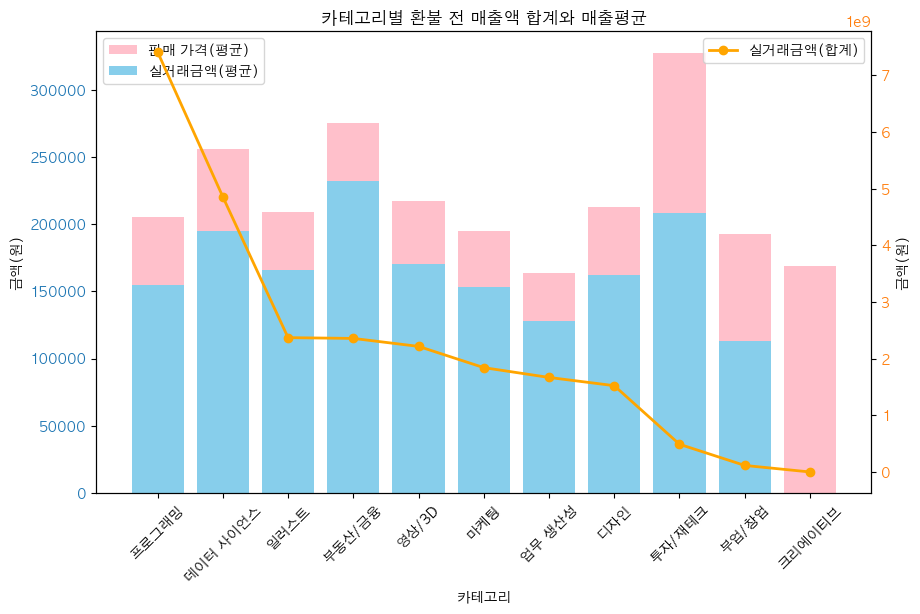

In [100]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 컬럼 - 막대 그래프
ax1.bar(cate_list, price_list, label='판매 가격(평균)', color='pink')

# 두 번째 컬럼 - 막대 그래프
ax1.bar(cate_list, trans_list, label='실거래금액(평균)', color='skyblue')

# y축 설정
ax1.set_ylabel('금액(원)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 범례 표시
ax1.legend(loc='upper left')

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 세 번째 컬럼 - 선 그래프
ax2.plot(cate_list, total_list, label='실거래금액(합계)', linewidth=2, color='orange', linestyle='-', marker='o')

# y축 설정
ax2.set_ylabel('금액(원)')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 범례 표시
ax2.legend(loc='upper right')

# x축 라벨 설정
ax1.set_xticklabels(cate_list, rotation=45)
ax1.set_xlabel('카테고리')

# 그래프 타이틀 설정
plt.title('카테고리별 환불 전 매출액 합계와 매출평균')

# 그래프 보여주기
plt.show()


In [112]:
# 환불금액까지 반영된 그래프를 만들기 위해 promotion이 아닌 실제 고객 데이터를 따로 만듦.
df_not_promotion = df[df['결제수단']!='PROMOTION']
# df_not_promotion['결제수단'].unique()
df_not_promotion

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 1. 1. 오전 12:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022. 1. 1. 오전 12:01:12,-,385000,CARD,385000,-,385000,-
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022. 1. 1. 오전 12:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022. 1. 2. 오전 11:01:24,-,289000,VBANK,289000,-,289000,-


In [119]:
# 판매가격 object->int
df_not_promotion['판매가격'] = df_not_promotion['판매가격'].str.replace('-', '0').astype(int)
# replace를 안하면 하이픈때문에 int로 astype이 안됨.
# df_not_promotion['판매가격'] = pd.to_numeric(df_not_promotion['판매가격'], errors='coerce').fillna(0).astype(int)
# 위와 같은 방법도 있음. (chatGPT 생성)


/var/folders/zs/h8q2p2l52vn4v0220zx8lp200000gn/T/ipykernel_3712/3577604803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_promotion['판매가격'] = df_not_promotion['판매가격'].str.replace('-', '0').astype(int)


In [128]:
# '카테고리'별로 '실거래금액'과 '판매금액'의 평균과 합계 계산
df_np = df_not_promotion.groupby('카테고리').agg({'실거래금액': ['mean', 'sum'], '판매가격': 'mean'})
df_np = df_np.reset_index()

# 계산한 결과의 컬럼 이름 변경
df_np.columns = ['카테고리', '실거래금액(평균)', '실거래금액(합계)', '판매가격(평균)']
# 실거래금액 합계 기준 내림차순 정렬
df_np = df_np.sort_values(by='실거래금액(합계)', ascending=False)

# list 반환
np_cate_list = df_np['카테고리'].tolist()
np_total = df_np['실거래금액(합계)'].tolist()
np_real = df_np['실거래금액(평균)'].tolist()
np_price = df_np['판매가격(평균)'].tolist()

# 결과 확인
print(df_np)
print(np_cate_list, np_total, np_real, np_price)

       카테고리      실거래금액(평균)   실거래금액(합계)       판매가격(평균)
9     프로그래밍  144292.045210  6708714350  206753.910892
0  데이터 사이언스  181072.625921  4372903916  258750.950311
3    부동산/금융  218508.708881  2194701472  277914.526085
7      일러스트  150709.129180  2140823180  211910.870820
6     영상/3D  161668.090107  2032814565  220052.409734
2       마케팅  145979.050883  1686933912  194684.103496
5    업무 생산성  121782.059594  1542856913  164634.241061
1       디자인  145802.229400  1367770714  214295.970579
8    투자/재테크  208086.233271   447801574  333622.908922
4     부업/창업  114168.318889   102751487  192495.555556
['프로그래밍', '데이터 사이언스', '부동산/금융', '일러스트', '영상/3D', '마케팅', '업무 생산성', '디자인', '투자/재테크', '부업/창업'] [6708714350, 4372903916, 2194701472, 2140823180, 2032814565, 1686933912, 1542856913, 1367770714, 447801574, 102751487] [144292.04521013465, 181072.62592132506, 218508.70888092392, 150709.12917986626, 161668.0901065691, 145979.05088265837, 121782.05959428527, 145802.22939985077, 208086.23327137547, 114168.31888888

/var/folders/zs/h8q2p2l52vn4v0220zx8lp200000gn/T/ipykernel_3712/3751001966.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(np_cate_list, rotation=45)


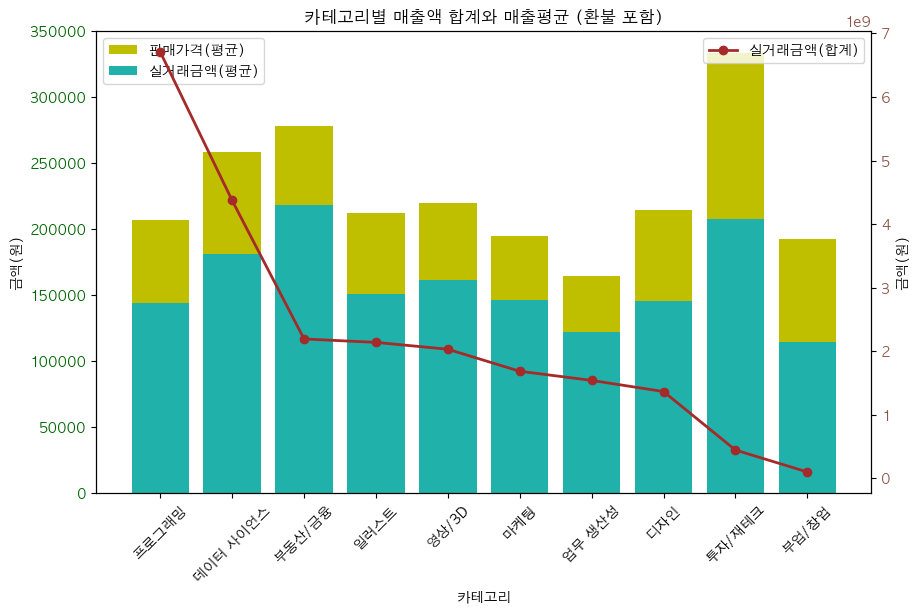

In [143]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 컬럼 - 막대 그래프
ax1.bar(np_cate_list, np_price, label='판매가격(평균)', color='y')

# 두 번째 컬럼 - 막대 그래프
ax1.bar(np_cate_list, np_real, label='실거래금액(평균)', color='lightseagreen')

# y축 설정
ax1.set_ylabel('금액(원)')
ax1.tick_params(axis='y', labelcolor='darkgreen')

# 범례 표시
ax1.legend(loc='upper left')

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 세 번째 컬럼 - 선 그래프
ax2.plot(np_cate_list, np_total, label='실거래금액(합계)', linewidth=2, color='brown', linestyle='-', marker='o')

# y축 설정
ax2.set_ylabel('금액(원)')
ax2.tick_params(axis='y', labelcolor='tab:brown')

# 범례 표시
ax2.legend(loc='upper right')

# x축 라벨 설정
ax1.set_xticklabels(np_cate_list, rotation=45)
ax1.set_xlabel('카테고리')

# 그래프 타이틀 설정
plt.title('카테고리별 매출액 합계와 매출평균 (환불 포함)')

# 그래프 보여주기
plt.show()


/var/folders/zs/h8q2p2l52vn4v0220zx8lp200000gn/T/ipykernel_3712/376095469.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(cate_list, rotation=45)
/var/folders/zs/h8q2p2l52vn4v0220zx8lp200000gn/T/ipykernel_3712/376095469.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(np_cate_list, rotation=45)


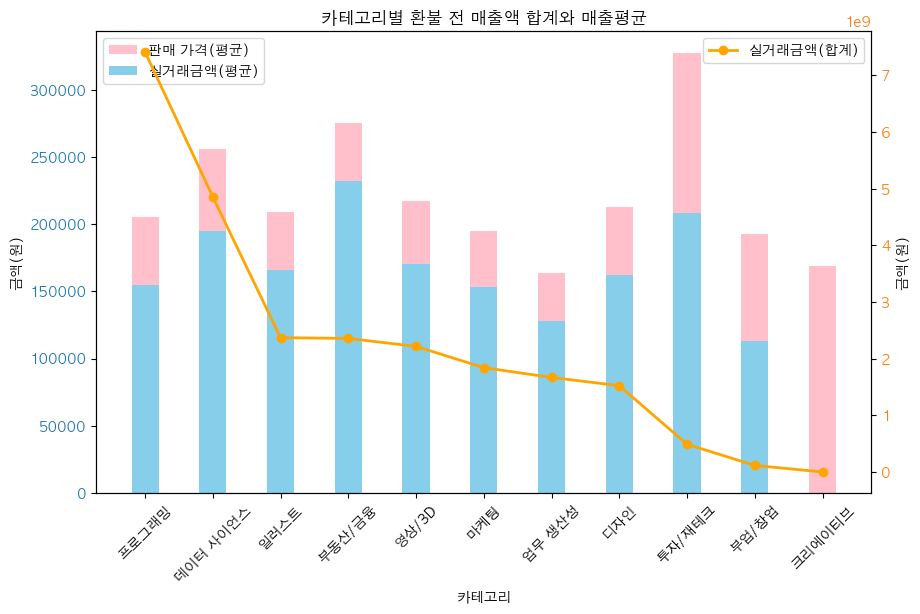

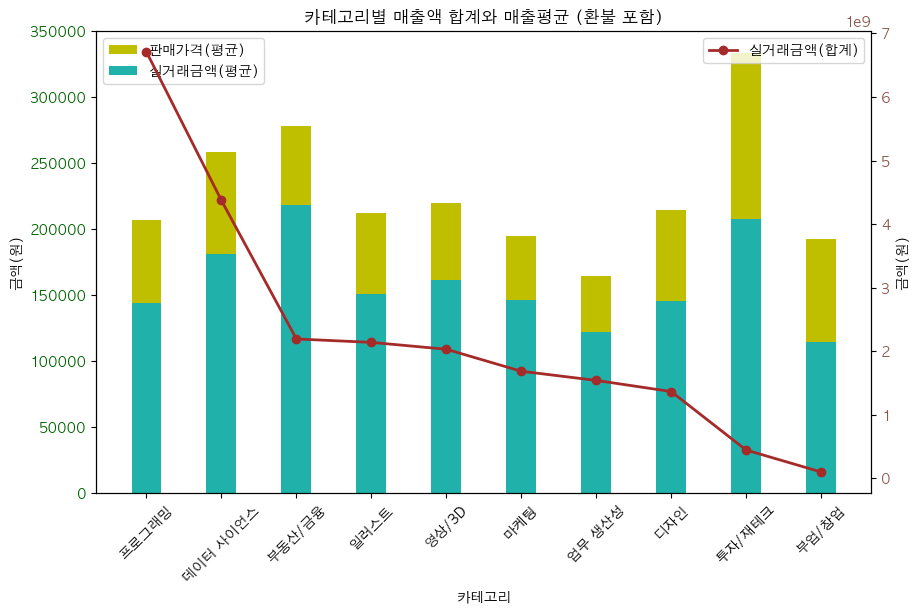

In [145]:
## 그래프 1
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(cate_list, price_list, label='판매 가격(평균)', color='pink', width=0.4)
ax1.bar(cate_list, trans_list, label='실거래금액(평균)', color='skyblue', width=0.4)
ax1.set_ylabel('금액(원)')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(cate_list, total_list, label='실거래금액(합계)', linewidth=2, color='orange', linestyle='-', marker='o')
ax2.set_ylabel('금액(원)')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper right')

ax1.set_xticklabels(cate_list, rotation=45)
ax1.set_xlabel('카테고리')

# 그래프 타이틀 설정
plt.title('카테고리별 환불 전 매출액 합계와 매출평균')


## 그래프 2
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 컬럼 - 막대 그래프
ax1.bar(np_cate_list, np_price, label='판매가격(평균)', color='y', width=0.4)

# 두 번째 컬럼 - 막대 그래프
ax1.bar(np_cate_list, np_real, label='실거래금액(평균)', color='lightseagreen', width=0.4)

# y축 설정
ax1.set_ylabel('금액(원)')
ax1.tick_params(axis='y', labelcolor='darkgreen')

# 범례 표시
ax1.legend(loc='upper left')

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 세 번째 컬럼 - 선 그래프
ax2.plot(np_cate_list, np_total, label='실거래금액(합계)', linewidth=2, color='brown', linestyle='-', marker='o')

# y축 설정
ax2.set_ylabel('금액(원)')
ax2.tick_params(axis='y', labelcolor='tab:brown')

# 범례 표시
ax2.legend(loc='upper right')

# x축 라벨 설정
ax1.set_xticklabels(np_cate_list, rotation=45)
ax1.set_xlabel('카테고리')

# 그래프 타이틀 설정
plt.title('카테고리별 매출액 합계와 매출평균 (환불 포함)')

# 그래프 보여주기
plt.show()


In [158]:
df_refund['환불금액'] = df_refund['환불금액'].str.replace('-', '0').astype(int)
df_refund.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11318 entries, 1112 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   거래id       11318 non-null  int64 
 1   유형         11318 non-null  object
 2   고객id       11318 non-null  int64 
 3   코스ID       11318 non-null  int64 
 4   사이트        11318 non-null  object
 5   포맷         11318 non-null  object
 6   카테고리       11318 non-null  object
 7   코스(상품) 이름  11318 non-null  object
 8   거래일자       11318 non-null  object
 9   쿠폰이름       11318 non-null  object
 10  판매가격       11318 non-null  object
 11  결제수단       11318 non-null  object
 12  실거래금액      11318 non-null  int64 
 13  쿠폰할인액      11318 non-null  object
 14  거래금액       11318 non-null  object
 15  환불금액       11318 non-null  int64 
dtypes: int64(5), object(11)
memory usage: 1.5+ MB


/var/folders/zs/h8q2p2l52vn4v0220zx8lp200000gn/T/ipykernel_3712/2845633479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refund['환불금액'] = df_refund['환불금액'].str.replace('-', '0').astype(int)


In [160]:
# 실거래금액이 환불금액과 같이 않은 행이 있는지 확인
df_refund[df_refund['실거래금액']!=(df_refund['환불금액']*-1)] # 없음

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액


In [151]:
df_refund.groupby(by=['카테고리'])['실거래금액'].sum().reset_index().sort_values(by='실거래금액', ascending=True)

,카테고리,실거래금액
9,프로그래밍,-705393654
0,데이터 사이언스,-483876674
7,일러스트,-230067085
6,영상/3D,-183843935
3,부동산/금융,-162831828
1,디자인,-155362156
2,마케팅,-154816182
5,업무 생산성,-125772992
8,투자/재테크,-41065176
4,부업/창업,-12536513


In [164]:
paycount = df_payment['고객id'].value_counts()
paycount = paycount.reset_index()
paycount

,고객id,count
0,89601,11
1,3930,10
2,81811,9
3,19956,8
4,25117,8
...,...,...
77205,36262,1
77206,27067,1
77207,67514,1
77208,82513,1


In [165]:
paycount.loc[paycount['count']>=4].count()

고객id     6324
count    6324
dtype: int64

In [166]:
paycount.loc[paycount['count']>=4].head(20)

,고객id,count
0,89601,11
1,3930,10
2,81811,9
3,19956,8
4,25117,8
5,98806,8
6,88384,8
7,14657,8
8,89421,8
9,88071,8


In [174]:
df[df['고객id']==89601]

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
21188,2284013,PAYMENT,89601,212668,FASTCAMPUS,올인원,프로그래밍,사이드 프로젝트 : 10개 기술스택으로 구현하는 풀스택 서버리스 프로젝트 with ...,2022. 11. 20. 오후 9:11:32,-,151000,CARD,151000,-,151000,-
22983,2273376,PAYMENT,89601,212599,FASTCAMPUS,올인원,일러스트,네오아카데미 : 까나의 초보자를 위한 SD 미니 캐릭터 그리기,2022. 11. 15. 오후 1:11:40,[WELCOME] 온라인 강의 3만원 할인,161000,CARD,131000,30000,131000,-
48863,2137708,PAYMENT,89601,213160,FASTCAMPUS,올인원,영상/3D,올인원 패키지 : 프리프로덕션부터 배우는 모션 그래픽 프로젝트 완성,2022. 9. 13. 오후 8:09:37,[WELCOME] 온라인 강의 2만원 할인,129000,CARD,109000,20000,109000,-
58060,2091682,PAYMENT,89601,212777,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 데이터 분석을 위한 기초 통계 완전 정복,2022. 8. 28. 오전 9:08:41,-,99000,CARD,99000,-,99000,-
67757,2039432,PAYMENT,89601,203498,FASTCAMPUS,올인원,업무 생산성,초격차 패키지 : 한 번에 끝내는 엑셀 실무,2022. 8. 4. 오후 6:08:16,-,146000,CARD,146000,-,146000,-
87883,1926245,PAYMENT,89601,211114,FASTCAMPUS,RED,데이터 사이언스,The RED : Snowflake를 활용한 클라우드 데이터 엔지니어링,2022. 6. 22. 오후 1:06:40,[무료수강권] The RED : Snowflake를 활용한 클라우드 데이터 엔지니어...,180000,PROMOTION,0,180000,0,-
89518,1917478,PAYMENT,89601,204631,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,2022. 6. 17. 오후 4:06:22,-,198000,CARD,198000,-,198000,-
92178,1901571,PAYMENT,89601,205625,FASTCAMPUS,올인원,일러스트,초격차 패키지 : 세상의 모든 감성 아이패드 드로잉,2022. 6. 10. 오전 11:06:44,[디자인] 3만원할인,188000,CARD,158000,30000,158000,-
103895,1831390,PAYMENT,89601,206224,FASTCAMPUS,올인원,투자/재테크,초격차 패키지 : 한 번에 끝내는 부동산 경매/공매,2022. 5. 4. 오전 7:05:58,[프로모션] 4월 100% 페이백 이벤트,354000,CARD,95000,259000,95000,-
117091,1757880,PAYMENT,89601,209597,FASTCAMPUS,올인원,데이터 사이언스,초격차 패키지 : 데이터 엔지니어링,2022. 3. 29. 오후 10:03:46,-,289000,CARD,289000,-,289000,-


In [178]:
df[df['고객id']==89601]['실거래금액'].sum()

1575000

In [179]:
df.groupby('고객id')['실거래금액'].sum().reset_index()

,고객id,실거래금액
0,0,165000
1,1,18000
2,3,-278000
3,6,787000
4,8,555000
...,...,...
79610,99994,7000
79611,99996,303000
79612,99997,-85666
79613,99998,940000


In [185]:
df[df['실거래금액']<0]

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
1112,2407283,REFUND,92793,213905,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 21개 프로젝트로 완성하는 인터랙티브 웹 개발 with Three...,2022. 12. 30. 오후 4:12:47,-,158000,CARD,-158000,-,-,-158000
1139,2406979,REFUND,94570,214402,FASTCAMPUS,올인원,데이터 사이언스,빵형의 수학 없이 뽀개는 인공지능 입문,2022. 12. 30. 오후 3:12:29,-,130000,CARD,-65000,-,-,-65000
1148,2406934,REFUND,68675,203935,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,2022. 12. 30. 오후 3:12:09,-,222000,CARD,-128000,-,-,-128000
1150,2406926,REFUND,5477,213244,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 30개 사례로 배우는 Anomaly Detection 알고리즘 구...,2022. 12. 30. 오후 2:12:16,-,226000,POINT,-221004,-,-,-221004
1154,2406884,REFUND,51192,211087,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것,2022. 12. 30. 오후 2:12:25,-,185000,TRANS,-185000,-,-,-185000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158633,1554321,REFUND,71667,206848,FASTCAMPUS,RED,데이터 사이언스,The RED : Youtube 알고리즘 개발자 이준석의 추천시스템 마스터 클래스,2022. 1. 3. 오전 10:01:54,-,709000,TRANS,-709000,-,-,-709000
158638,1554311,REFUND,53721,203720,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,2022. 1. 3. 오전 10:01:34,-,220000,CARD,-190000,-,-,-190000
158640,1554309,REFUND,88030,204366,FASTCAMPUS,올인원,마케팅,올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱,2022. 1. 3. 오전 10:01:25,-,136000,POINT,-136000,-,-,-136000
158642,1554306,REFUND,69980,202072,FASTCAMPUS,올인원,프로그래밍,올인원 패키지 : 코딩 첫 걸음 프로젝트,2022. 1. 3. 오전 10:01:01,-,162000,CARD,-162000,-,-,-162000


In [209]:
df_total_byid = df.groupby('고객id')['실거래금액'].sum()
df_total_byid = df_total_byid.reset_index()
df_total_byid_minus = df_total_byid[df_total_byid['실거래금액'] <0]
minus_list = df_total_byid_minus['고객id'].tolist()
df_total_byid_minus

,고객id,실거래금액
2,3,-278000
41,50,-316000
59,70,-60000
94,110,-10000
97,114,-233000
...,...,...
79586,99962,-121000
79592,99969,-65000
79605,99989,-195000
79606,99990,-106000


In [208]:
minus_list

[3,
 50,
 70,
 110,
 114,
 136,
 140,
 143,
 157,
 158,
 199,
 284,
 349,
 391,
 516,
 533,
 564,
 585,
 622,
 626,
 645,
 661,
 669,
 691,
 713,
 739,
 761,
 857,
 861,
 883,
 896,
 905,
 908,
 909,
 952,
 960,
 988,
 1030,
 1031,
 1043,
 1044,
 1064,
 1068,
 1075,
 1083,
 1086,
 1106,
 1152,
 1154,
 1171,
 1174,
 1184,
 1239,
 1251,
 1259,
 1281,
 1295,
 1307,
 1320,
 1327,
 1338,
 1345,
 1347,
 1362,
 1401,
 1419,
 1453,
 1479,
 1500,
 1501,
 1535,
 1606,
 1610,
 1627,
 1639,
 1704,
 1706,
 1711,
 1724,
 1729,
 1799,
 1802,
 1804,
 1854,
 1938,
 1950,
 1984,
 1988,
 1997,
 2003,
 2030,
 2060,
 2080,
 2177,
 2211,
 2259,
 2268,
 2272,
 2288,
 2306,
 2314,
 2315,
 2335,
 2378,
 2419,
 2441,
 2450,
 2471,
 2493,
 2530,
 2551,
 2576,
 2589,
 2612,
 2633,
 2655,
 2661,
 2673,
 2745,
 2747,
 2752,
 2768,
 2772,
 2775,
 2811,
 2832,
 2839,
 2857,
 2871,
 2889,
 2903,
 2910,
 2972,
 2973,
 3021,
 3022,
 3036,
 3055,
 3059,
 3104,
 3134,
 3142,
 3145,
 3174,
 3176,
 3199,
 3225,
 3227,
 3240

In [207]:
df[df['고객id']==1711]

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
90612,1908728,REFUND,1711,211087,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것,2022. 6. 13. 오후 6:06:26,-,169000,POINT,-139000,-,-,-139000


In [182]:
df[df['고객id']==99997]

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
77172,1987201,REFUND,99997,206511,FASTCAMPUS,올인원,디자인,올인원 패키지 : 시선을 사로잡는 브랜드 디자인,2022. 7. 15. 오전 11:07:58,-,257000,CARD,-85666,-,-,-85666


In [ ]:
df_payment['고객id'].nunique()

In [ ]:
creative = df_payment[df_payment['카테고리']=='크리에이티브']
creative

In [ ]:
df_payment.drop(creative.index, inplace=True)
df_payment

In [ ]:
df_payment[df_payment['쿠폰이름'].str.contains('검수')]['쿠폰이름'].unique()

In [ ]:
df_payment[df_payment['쿠폰이름'].str.contains('무료')]['쿠폰이름'].unique()

In [ ]:
df_payment.loc[df_payment['쿠폰이름'].str.contains('무료'), ['쿠폰이름','결제수단','실거래금액']]

In [ ]:
df_payment[df_payment['결제수단']=='PROMOTION']['실거래금액'].unique()

In [ ]:
df_payment[df_payment['결제수단']=='PROMOTION']['쿠폰이름'].unique()
# df_payment[df_payment['결제수단']=='PROMOTION']['쿠폰이름'].isna().unique()

In [45]:
df_promotion = df_payment[df_payment['결제수단']=='PROMOTION']
df_promotion

,유형,고객id,코스ID,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
21,PAYMENT,60037,205548,올인원,데이터 사이언스,초격차 패키지 : 한 번에 끝내는 데이터 분석,2022. 12. 31. 오후 11:12:27,[100% 쿠폰] 디마즈 1기 강의 100% 수강권,183000,PROMOTION,0,183000,0,-
68,PAYMENT,47018,205648,올인원,부동산/금융,초격차 패키지 : 한번에 끝내는 금융ㆍ투자(IB) 실무,2022. 12. 31. 오후 11:12:57,[100% 쿠폰] 디마즈 1기 강의 100% 수강권,348000,PROMOTION,0,348000,0,-
85,PAYMENT,90179,214833,올인원,일러스트,네오아카데미 : 후와리의 스토리가 느껴지는 라이트 노벨 일러스트,2022. 12. 31. 오후 11:12:24,[무료수강권] 후와리의 스토리가 느껴지는 라이트 노벨 일러스트,250000,PROMOTION,0,250000,0,-
110,PAYMENT,51193,213981,RED,마케팅,The RED : 나 자신과 여행하는 에세이 창작법 by. 이병률,2022. 12. 31. 오후 11:12:37,[30개글감으로에세이작가되기 출판 수강생 전용]글쓰기 카테고리 the red 수강권,158000,PROMOTION,0,158000,0,-
154,PAYMENT,56552,214561,올인원,프로그래밍,[무료 강의] Solana&Rust 블록체인 개발 아카데미 Lv.1,2022. 12. 31. 오후 11:12:33,[무료수강권] Solana&Rust 블록체인 개발 아카데미 Lv.1,129000,PROMOTION,0,129000,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158924,PAYMENT,77736,202301,올인원,프로그래밍,올인원 패키지 : C++ 실력완성,2022. 1. 3. 오전 12:01:25,[프로모션] 12월 1+1 수강권 이벤트,202000,PROMOTION,0,221000,0,-
158925,PAYMENT,54975,202614,올인원,데이터 사이언스,올인원 패키지 : 컴퓨터비전과 딥러닝,2022. 1. 3. 오전 12:01:13,[프로모션] 12월 1+1 수강권 이벤트,205000,PROMOTION,0,210000,0,-
159170,PAYMENT,97255,206268,올인원,프로그래밍,올인원 패키지 : 최성일의 코딩 초급자를 위한 웹 모션 디자인,2022. 1. 1. 오후 10:01:23,[무료수강권] 강의 참고용 발행_지인할인쿠폰,196000,PROMOTION,0,196000,0,-
159171,PAYMENT,7800,205747,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 React의 모든 것,2022. 1. 1. 오후 10:01:59,[무료수강권] 강의 참고용 발행_지인할인쿠폰,232000,PROMOTION,0,232000,0,-


In [46]:
df_promotion[df_promotion['쿠폰할인액']=='-'] = '0'
df_promotion['쿠폰할인액'] = df_promotion['쿠폰할인액'].astype(int)

/var/folders/zs/h8q2p2l52vn4v0220zx8lp200000gn/T/ipykernel_3712/215365560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_promotion[df_promotion['쿠폰할인액']=='-'] = '0'
/var/folders/zs/h8q2p2l52vn4v0220zx8lp200000gn/T/ipykernel_3712/215365560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_promotion['쿠폰할인액'] = df_promotion['쿠폰할인액'].astype(int)


In [47]:
df_promotion['판매가격'] = df_promotion['판매가격'].astype(int)

/var/folders/zs/h8q2p2l52vn4v0220zx8lp200000gn/T/ipykernel_3712/1109091469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_promotion['판매가격'] = df_promotion['판매가격'].astype(int)


In [48]:
df_promotion[df_promotion['쿠폰할인액']<df_promotion['판매가격']]

,유형,고객id,코스ID,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
112424,PAYMENT,94900,204631,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,2022. 4. 8. 오후 9:04:42,[프로모션] 3월 1+1 수강권 이벤트,196000,PROMOTION,0,98500,0,-


In [ ]:
df_promotion.drop(['유형','결제수단','실거래금액','환불금액', '거래금액'], axis=1, inplace=True)
df_promotion

In [ ]:
df_payment.drop(df_promotion.index, axis=0, inplace=True)
df_payment['결제수단'].unique()

In [ ]:
df_payment.loc[df_payment['쿠폰이름'].str.contains('단체'), ['결제수단', '실거래금액']]

In [ ]:
df_payment[df_payment['고객id']==62879]

In [ ]:
df_refund[df_refund['고객id']==62879]